In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
perda = pd.read_excel("perda.xlsx")
perda.head()

,estoque_analitico_idsubproduto,Descrição do Produto,produto_grade_subdescricao,secao_descrsecao,grupo_descrgrupo,subgrupo_descrsubgrupo,estoque_analitico_idoperacao,operacao_interna_descroperacao,Quantidade,Total Líquido
0,34082,FUMACA LIQUIDA SPRAY 150ML,NaN,BAZAR GERAL + TEXTIL,"CAMA, MESA, BANHO",COZINHA,1082,Perdas de Estoque,4.0,63.20
1,26867,LIMPA BORDAS ASTRALPOOL 1L,NaN,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ARTIGOS DE PISCINA,1082,Perdas de Estoque,1.0,19.99
2,35782,ESPETO BAMBU TALGE C/50 18CM,NaN,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ESPETOS E GRELHAS,1082,Perdas de Estoque,2.0,3.10
3,39387,"BOTIJAO SOPRANO TERMICO 2,5L VM",NaN,BAZAR GERAL + TEXTIL,DESCARTAVEIS,EMBALAGENS TERMICAS,1082,Perdas de Estoque,1.0,27.93
4,106481,COLA THREE BOND SUPER 1000 2G,NaN,BAZAR GERAL + TEXTIL,ENCARTELADOS,OUTROS ENCARTELADOS,1082,Perdas de Estoque,1.0,0.84


In [ ]:
# Renomear colunas do DataFrame perda
perda = perda.rename(columns={
    'estoque_analitico_idsubproduto': 'Codigo',
    'Descrição do Produto': 'Descricao',
    'secao_descrsecao': 'Secao',
    'grupo_descrgrupo': 'Grupo',
    'subgrupo_descrsubgrupo': 'Subgrupo',
    'estoque_analitico_idoperacao': 'Operacao',
    'Quantidade': 'Quantidade',
    'Total Líquido': 'Valor'
})

# Exibir as primeiras linhas com as colunas renomeadas
display(perda.head())

,Codigo,Descricao,produto_grade_subdescricao,Secao,Grupo,Subgrupo,Operacao,operacao_interna_descroperacao,Quantidade,Valor
0,34082,FUMACA LIQUIDA SPRAY 150ML,NaN,BAZAR GERAL + TEXTIL,"CAMA, MESA, BANHO",COZINHA,1082,Perdas de Estoque,4.0,63.20
1,26867,LIMPA BORDAS ASTRALPOOL 1L,NaN,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ARTIGOS DE PISCINA,1082,Perdas de Estoque,1.0,19.99
2,35782,ESPETO BAMBU TALGE C/50 18CM,NaN,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ESPETOS E GRELHAS,1082,Perdas de Estoque,2.0,3.10
3,39387,"BOTIJAO SOPRANO TERMICO 2,5L VM",NaN,BAZAR GERAL + TEXTIL,DESCARTAVEIS,EMBALAGENS TERMICAS,1082,Perdas de Estoque,1.0,27.93
4,106481,COLA THREE BOND SUPER 1000 2G,NaN,BAZAR GERAL + TEXTIL,ENCARTELADOS,OUTROS ENCARTELADOS,1082,Perdas de Estoque,1.0,0.84


In [ ]:
perda.drop(columns=['produto_grade_subdescricao'])

,Codigo,Descricao,Secao,Grupo,Subgrupo,Operacao,operacao_interna_descroperacao,Quantidade,Valor
0,34082,FUMACA LIQUIDA SPRAY 150ML,BAZAR GERAL + TEXTIL,"CAMA, MESA, BANHO",COZINHA,1082,Perdas de Estoque,4.0,63.20
1,26867,LIMPA BORDAS ASTRALPOOL 1L,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ARTIGOS DE PISCINA,1082,Perdas de Estoque,1.0,19.99
2,35782,ESPETO BAMBU TALGE C/50 18CM,BAZAR GERAL + TEXTIL,CAMPING E PESCA,ESPETOS E GRELHAS,1082,Perdas de Estoque,2.0,3.10
3,39387,"BOTIJAO SOPRANO TERMICO 2,5L VM",BAZAR GERAL + TEXTIL,DESCARTAVEIS,EMBALAGENS TERMICAS,1082,Perdas de Estoque,1.0,27.93
4,106481,COLA THREE BOND SUPER 1000 2G,BAZAR GERAL + TEXTIL,ENCARTELADOS,OUTROS ENCARTELADOS,1082,Perdas de Estoque,1.0,0.84
...,...,...,...,...,...,...,...,...,...
478,15546,COND ELSEVE HYDRA DETOX 48H 200ML,PERFUMARIA,PRODUTOS CAPILARES,CONDICIONADORES ATE 250ML,1082,Perdas de Estoque,2.0,27.88
479,10826,SHA DARLING 2 EM 1 350ML,PERFUMARIA,SHAMPOO,SHAMPOO ACIMA DE 250ML,1082,Perdas de Estoque,2.0,12.68
480,10827,SHA DARLING CERAM. 350ML,PERFUMARIA,SHAMPOO,SHAMPOO ACIMA DE 250ML,1082,Perdas de Estoque,1.0,6.34
481,24042,SHA MSA ALHO MATIZADOR THERAPY 340ML,PERFUMARIA,SHAMPOO,SHAMPOO ACIMA DE 250ML,1082,Perdas de Estoque,1.0,30.65


In [50]:
perda.groupby('Secao')[['Quantidade', 'Valor']].sum().sort_values(by='Quantidade', ascending=False)

,Quantidade,Valor
Secao,,
PADARIA,2648.744,31603.97
MERCEARIA DOCE,652.000,2327.51
MERCEARIA SALGADA,449.000,1576.86
MERCEARIA SECA,308.000,1449.32
BEBIDAS,301.000,1184.59
PERECIVEIS,76.534,690.43
HORTIFRUTI,63.608,293.71
PERFUMARIA,40.000,356.33
BAZAR GERAL + TEXTIL,35.000,220.93


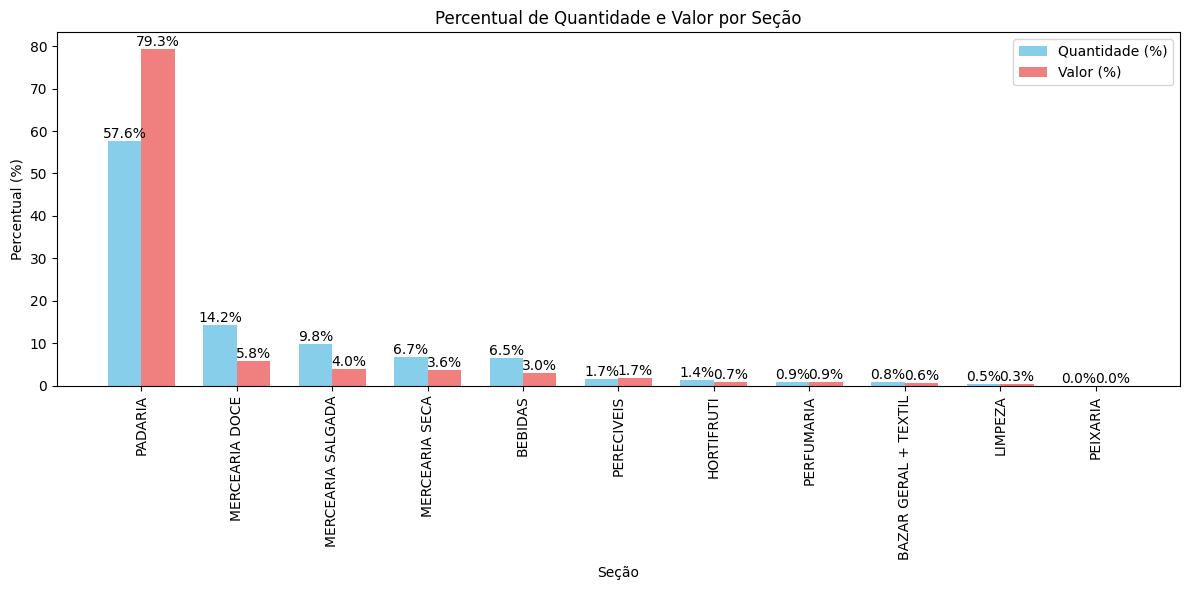

In [54]:
perda_secao_grouped = perda.groupby('Secao')[['Quantidade', 'Valor']].sum().reset_index()

perda_secao_grouped['quantidade_percentual'] = (perda_secao_grouped['Quantidade'] / perda_secao_grouped['Quantidade'].sum()) * 100
perda_secao_grouped['valor_percentual'] = (perda_secao_grouped['Valor'] / perda_secao_grouped['Valor'].sum()) * 100

# Sort by quantity percentage for better visualization
perda_secao_grouped = perda_secao_grouped.sort_values(by='quantidade_percentual', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(perda_secao_grouped['Secao']))

bars1 = ax.bar(index, perda_secao_grouped['quantidade_percentual'], bar_width, label='Quantidade (%)', color='skyblue')
bars2 = ax.bar(index + bar_width, perda_secao_grouped['valor_percentual'], bar_width, label='Valor (%)', color='lightcoral')

ax.set_xlabel('Seção')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Quantidade e Valor por Seção')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(perda_secao_grouped['Secao'], rotation=90)
ax.legend()

# Add percentage labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()